In [0]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [0]:
html_data=requests.get('https://sports.ndtv.com/cricket/players/857-rohit-sharma-playerprofile/stats').text

In [0]:
soup=BeautifulSoup(html_data,'html5lib')
 

In [0]:
data=soup.find_all('div',{"data-id":"2"})
                                                                                                                

[<div class="mod-body lastfive" data-id="2">
 <div class="score-board batting">
 </div>
 <table border="0" cellpadding="0" cellspacing="0" width="100%">
 <tbody>
 <tr>
 <th scope="col">
 Batting
 </th>
 <th scope="col">
 Bowling
 </th>
 <th scope="col">
 Opposition
 </th>
 <th scope="col">
 Match Date
 </th>
 </tr>
  <tr>
 <td>
 104(92)  
 </td>
 <td>
  - 
 </td>
 <td>
 <span class="sm-cap">v</span> Bangladesh
 </td>
 <td>
 Jul 02, 2019
 </td>
 </tr>
  <tr>
 <td>
 102(109)  
 </td>
 <td>
  - 
 </td>
 <td>
 <span class="sm-cap">v</span> England
 </td>
 <td>
 Jun 30, 2019
 </td>
 </tr>
  <tr>
 <td>
 18(23)  
 </td>
 <td>
  - 
 </td>
 <td>
 <span class="sm-cap">v</span> West Indies
 </td>
 <td>
 Jun 27, 2019
 </td>
 </tr>
  <tr>
 <td>
 1(10)  
 </td>
 <td>
  - 
 </td>
 <td>
 <span class="sm-cap">v</span> Afghanistan
 </td>
 <td>
 Jun 22, 2019
 </td>
 </tr>
  <tr>
 <td>
 140(113)  
 </td>
 <td>
  - 
 </td>
 <td>
 <span class="sm-cap">v</span> Pakistan
 </td>
 <td>
 Jun 16, 2019
 </td>
 </t

In [0]:
batting=[]
for i in soup.find_all('div',{"data-id":"2"},'tr'):
  for j in i.find_all('td'):
     batting.append(j.get_text())      

In [0]:
batting


['\n104(92)  \n',
 '\n - \n',
 '\nv Bangladesh\n',
 '\nJul 02, 2019\n',
 '\n102(109)  \n',
 '\n - \n',
 '\nv England\n',
 '\nJun 30, 2019\n',
 '\n18(23)  \n',
 '\n - \n',
 '\nv West Indies\n',
 '\nJun 27, 2019\n',
 '\n1(10)  \n',
 '\n - \n',
 '\nv Afghanistan\n',
 '\nJun 22, 2019\n',
 '\n140(113)  \n',
 '\n - \n',
 '\nv Pakistan\n',
 '\nJun 16, 2019\n']

In [0]:

y=[]
for i in batting:
  x=i.replace('\n','') 
  y.append(x)            
  

In [0]:
y

['104(92)  ',
 ' - ',
 'v Bangladesh',
 'Jul 02, 2019',
 '102(109)  ',
 ' - ',
 'v England',
 'Jun 30, 2019',
 '18(23)  ',
 ' - ',
 'v West Indies',
 'Jun 27, 2019',
 '1(10)  ',
 ' - ',
 'v Afghanistan',
 'Jun 22, 2019',
 '140(113)  ',
 ' - ',
 'v Pakistan',
 'Jun 16, 2019']

In [0]:
x1=y[:4]
x2=y[4:8]
x3=y[8:12]
x4=y[12:16]
x5=y[16:20]

In [0]:
cols=['Batting','Bowling','Team','Date']

In [0]:
Rohit=pd.DataFrame([x1,x2,x3,x4,x5],columns=cols)

In [0]:
Rohit

,Batting,Bowling,Team,Date
0,104(92),-,v Bangladesh,"Jul 02, 2019"
1,102(109),-,v England,"Jun 30, 2019"
2,18(23),-,v West Indies,"Jun 27, 2019"
3,1(10),-,v Afghanistan,"Jun 22, 2019"
4,140(113),-,v Pakistan,"Jun 16, 2019"


In [0]:
x=Rohit.iloc[:,0].values

In [0]:
x[0].split('(')[0]

'104'

In [0]:
Run=[]
for i in x:
  Run.append(i.split('(')[0])

In [0]:
Run

['104', '102', '18', '1', '140']

In [0]:
Rohit['Run']=Run

In [0]:
Rohit

,Batting,Bowling,Team,Date,Run
0,104(92),-,v Bangladesh,"Jul 02, 2019",104
1,102(109),-,v England,"Jun 30, 2019",102
2,18(23),-,v West Indies,"Jun 27, 2019",18
3,1(10),-,v Afghanistan,"Jun 22, 2019",1
4,140(113),-,v Pakistan,"Jun 16, 2019",140


In [0]:
x[0].split('(')[1].replace(')','')

'92  '

In [0]:
Bowls=[]
for i in x:
  Bowls.append(i.split('(')[1].replace(')',''))

In [0]:
Bowls

['92  ', '109  ', '23  ', '10  ', '113  ']

In [0]:
Rohit['Bowls']=Bowls

In [0]:
Rohit

,Batting,Bowling,Team,Date,Run,Bowls
0,104(92),-,v Bangladesh,"Jul 02, 2019",104,92
1,102(109),-,v England,"Jun 30, 2019",102,109
2,18(23),-,v West Indies,"Jun 27, 2019",18,23
3,1(10),-,v Afghanistan,"Jun 22, 2019",1,10
4,140(113),-,v Pakistan,"Jun 16, 2019",140,113


# Apply Reggression

In [0]:
run=Rohit.iloc[:,4:5].values

In [0]:
bowl=Rohit.iloc[:,5:].values

In [0]:
run=run.astype('int')

In [0]:
run

array([[104],
       [102],
       [ 18],
       [  1],
       [140]])

In [0]:
bowl=bowl.astype('int')

In [0]:
bowl

array([[ 92],
       [109],
       [ 23],
       [ 10],
       [113]])

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [0]:
# Reggression
regr1=LinearRegression()

In [0]:
trained1=regr1.fit(bowl,run)

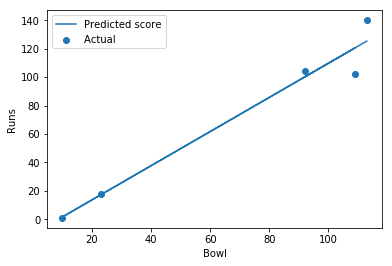

In [0]:
plt.xlabel('Bowl')
plt.ylabel('Runs')
plt.scatter(bowl,run,label='Actual ')
plt.plot(bowl,trained1.predict(bowl),label='Predicted score')
plt.legend()

In [0]:
# NOw applying polynomial regre
poly=PolynomialFeatures(degree=15)

In [0]:
new_bowl=poly.fit_transform(bowl)

In [0]:
new_bowl

array([[1.00000000e+00, 9.20000000e+01, 8.46400000e+03, 7.78688000e+05,
        7.16392960e+07, 6.59081523e+09, 6.06355001e+11, 5.57846601e+13,
        5.13218873e+15, 4.72161363e+17, 4.34388454e+19, 3.99637378e+21,
        3.67666388e+23, 3.38253077e+25, 3.11192831e+27, 2.86297404e+29],
       [1.00000000e+00, 1.09000000e+02, 1.18810000e+04, 1.29502900e+06,
        1.41158161e+08, 1.53862395e+10, 1.67710011e+12, 1.82803912e+14,
        1.99256264e+16, 2.17189328e+18, 2.36736367e+20, 2.58042641e+22,
        2.81266478e+24, 3.06580461e+26, 3.34172703e+28, 3.64248246e+30],
       [1.00000000e+00, 2.30000000e+01, 5.29000000e+02, 1.21670000e+04,
        2.79841000e+05, 6.43634300e+06, 1.48035889e+08, 3.40482545e+09,
        7.83109853e+10, 1.80115266e+12, 4.14265112e+13, 9.52809758e+14,
        2.19146244e+16, 5.04036362e+17, 1.15928363e+19, 2.66635235e+20],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, 1.00000000e+03,
        1.00000000e+04, 1.00000000e+05, 1.00000000e+06, 1.000

In [0]:
trained2=regr1.fit(new_bowl,run)

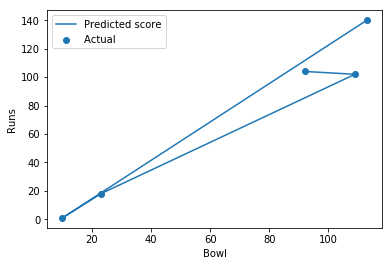

In [0]:
plt.xlabel('Bowl')
plt.ylabel('Runs')
plt.scatter(bowl,run,label='Actual ')
plt.plot(bowl,trained2.predict(new_bowl),label='Predicted score')
plt.legend()